# Qusetion 2 - part 4



this is simple initialization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu1 = np.array([4,11])
mu2 = np.array([10,3])
Sigma = 3*np.eye(2)
P1, P2 = 0.6, 0.4


here I am drawing the samples.

In [ ]:
# sample
X1 = np.random.multivariate_normal(mu1, Sigma, size=100)
X2 = np.random.multivariate_normal(mu2, Sigma, size=100)

here I am preparing the grid

In [ ]:
xx, yy = np.meshgrid(np.linspace(-2,16,400), np.linspace(-2,16,400))
grid = np.c_[xx.ravel(), yy.ravel()]

here I define the discriminant functions and their intersection

In [ ]:
g1 = -0.5*np.sum((grid-mu1) @ np.linalg.inv(Sigma) * (grid-mu1), axis=1) + np.log(P1)
g2 = -0.5*np.sum((grid-mu2) @ np.linalg.inv(Sigma) * (grid-mu2), axis=1) + np.log(P2)

Z = (g1 - g2).reshape(xx.shape)

plotting

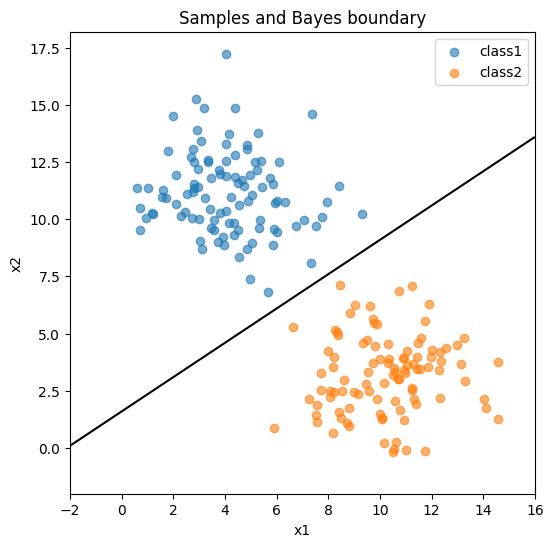

In [ ]:
plt.figure(figsize=(6,6))
plt.contour(xx,yy,Z,levels=[0],colors='k')   # decision boundary
plt.scatter(X1[:,0], X1[:,1], label='class1', alpha=0.6)
plt.scatter(X2[:,0], X2[:,1], label='class2', alpha=0.6)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Samples and Bayes boundary')
plt.show()

# Question 7 - Part 1
The problem requires finding the probability that a random person who tests positive is a drug user, $P(D = 1|T = 1)$, using Bayes' Theorem.

### 1. Define Events and Given Probabilities

Let $D=1$ be the event of **Drug Use** and $T=1$ be the event of a **Positive Test**.

### 2. Calculate Derived Probabilities

First, find the probability of a non-user $P(D=0)$ and the False Positive Rate $P(T = 1|D = 0)$.

\begin{align*}
P(D = 0) &= 1 - P(D = 1) = 1 - 0.001 = 0.999 \\
P(T = 1|D = 0) &= 1 - P(T = 0|D = 0) = 1 - 0.99 = 0.01
\end{align*}

### 3. Calculate the Total Probability of Testing Positive, $P(T = 1)$

Using the Law of Total Probability:
$$P(T = 1) = P(T = 1|D = 1)P(D = 1) + P(T = 1|D = 0)P(D = 0)$$

Substitute the values:
\begin{align*}
P(T = 1) &= (0.99)(0.001) + (0.01)(0.999) \\
P(T = 1) &= 0.00099 + 0.00999 \\
P(T = 1) &= 0.01098
\end{align*}

### 4. Apply Bayes' Theorem

The Posterior Probability $P(D = 1|T = 1)$ is:
$$P(D = 1|T = 1) = \frac{P(T = 1|D = 1)P(D = 1)}{P(T = 1)}$$

Substitute the calculated values:
\begin{align*}
P(D = 1|T = 1) &= \frac{0.00099}{0.01098} \\
P(D = 1|T = 1) &= \frac{99}{1098} \\
P(D = 1|T = 1) &\approx 0.09016
\end{align*}

### Conclusion
The probability that a person who tests positive is a drug user is approximately $0.09016$, or about $9.02\%$.

In [ ]:
P_T_1_D_1 = 0.99
P_T_1_D_0 = 0.01
P_T_0_D_1 = 0.01
P_T_0_D_0 = 0.99
P_D_1 = 0.001

P_D_1_T_1 = (P_T_1_D_1 * P_D_1) / ((P_T_1_D_1 * P_D_1) + (P_T_1_D_0 * (1 - P_D_1)))
print(P_D_1_T_1)

0.09016393442622951


# Question 7 - part 2


part a

In [ ]:
x = [(0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 0), (1, 1), (1, 0)]
y = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
x = np.array(x)
y = np.array(y)
P_y_1 = (y == 1).sum() / len(y)
P_y_0 = (y == 0).sum() / len(y)
print("P(y = 1) = ",P_y_1,"\nP(y = 0) = ", P_y_0)

P(y = 1) =  0.5 
P(y = 0) =  0.5


part b

In [ ]:
P_x1_1_y_1 = ((x[:, 0] == 1) & (y == 1)).sum() / ((y == 1).sum())
P_x2_1_y_1 = ((x[:, 1] == 1) & (y == 1)).sum() / ((y == 1).sum())
P_x1_1_y_0 = ((x[:, 0] == 1) & (y == 0)).sum() / ((y == 0).sum())
P_x2_1_y_0 = ((x[:, 1] == 1) & (y == 0)).sum() / ((y == 0).sum())
print("P(x_1 = 1|y = 1) = ",P_x1_1_y_1)
print("P(x_2 = 1|y = 1) = ",P_x2_1_y_1)
print("P(x_1 = 1|y = 0) = ",P_x1_1_y_0)
print("P(x_2 = 1|y = 0) = ",P_x2_1_y_0)

P(x_1 = 1|y = 1) =  0.8
P(x_2 = 1|y = 1) =  1.0
P(x_1 = 1|y = 0) =  0.6
P(x_2 = 1|y = 0) =  0.0


part c

In [ ]:
test_x = (1, 1)
P_y_1_x = P_x1_1_y_1 * P_x2_1_y_1 * P_y_1
P_y_0_x = P_x1_1_y_0 * P_x2_1_y_0 * P_y_0
print("probability of y = 0 given this sample = ", P_y_0_x)
print("probability of y = 1 given this sample = ", P_y_1_x)
if P_y_0_x > P_y_1_x:
    print("the sample belongs to class 0")
else:
    print("the sample belongs to class 1")

probability of y = 0 given this sample =  0.0
probability of y = 1 given this sample =  0.4
the sample belongs to class 1


# Question 8 - Part 1

here we load the data and verify its size

In [1]:
TRAIN_FILE = 'train'
TEST_FILE = 'test'

def parse_line(line):
    # Example line:
    # /000/003 ham need 1 fw 1 35 2 39 1 ...
    toks = line.strip().split()
    if len(toks) < 2:
        raise ValueError("Bad line: "+line)
    _id = toks[0]
    label = toks[1]   # 'ham' or 'spam' (or similar)
    word_counts = {}
    # remaining tokens expected in (word, count) pairs
    rest = toks[2:]
    i = 0
    while i < len(rest):
        word = rest[i]
        # if there's no count following, assume count=1
        word = word.lower()
        if i+1 >= len(rest):
            cnt = 1
            i += 1
        else:
            # attempt to parse next token as count; if fails, treat next as word (rare)
            nxt = rest[i+1]
            try:
                cnt = int(nxt)
                i += 2
            except ValueError:
                # fallback: treat current token as word with count 1, advance by 1
                cnt = 1
                i += 1
        # accumulate
        word_counts[word] = word_counts.get(word, 0) + cnt
    return _id, label, word_counts


def load_dataset(path):
    docs = []
    with open(path, 'r', encoding='utf8', errors='ignore') as f:
        for line in f:
            line = line.strip()
            if not line: continue
            _id, label, wc = parse_line(line)
            docs.append((_id, label, wc))
    return docs


train_docs = load_dataset(TRAIN_FILE)
test_docs  = load_dataset(TEST_FILE)

print("Train size:", len(train_docs), "Test size:", len(test_docs))

Train size: 9000 Test size: 1000


# Question 8 - Part 2

in this cell I do some pre-processing and answer the questios in the PDF using them.

In [2]:
from collections import defaultdict, Counter

def train_nb(train_docs, m_default=None):
    doc_count = Counter()
    token_count = {'spam':0, 'ham':0}
    word_counts = {'spam':defaultdict(int), 'ham':defaultdict(int)}
    vocab = set()

    for _id, label, wc in train_docs:
        lab = label.lower()
        if lab not in ('spam','ham'):
            # try interpreting other label tokens: e.g. '0'/'1' or 's'/'h'
            if lab in ('s','spam'):
                lab = 'spam'
            elif lab in ('h','ham'):
                lab = 'ham'
            else:
                # assume 'ham' if label not recognized (unlikely)
                lab = lab
        doc_count[lab] += 1
        for w,c in wc.items():
            word_counts[lab][w] += c
            token_count[lab] += c
            vocab.add(w)

    V = len(vocab)
    if m_default is None:
        m_default = V   # assignment default

    priors = {lab: (doc_count[lab] / sum(doc_count.values())) for lab in doc_count}
    return {
        'priors': priors,
        'word_counts': word_counts,
        'token_count': token_count,
        'vocab': vocab,
        'V': V,
        'm_default': m_default
    }


model = train_nb(train_docs)
print("Vocab size:", model['V'])
print("P(spam) (train):", model['priors'].get('spam',0.0))
print("P(ham)  (train):", model['priors'].get('ham',0.0))

Vocab size: 1000
P(spam) (train): 0.5736666666666667
P(ham)  (train): 0.42633333333333334


# Question 8 - Part 3

In [28]:
def compute_pw_given_class(model, m=None, p_base=None):
    # returns Pw_spam, Pw_ham dictionaries of P(word|class)
    if m is None:
        m = model['m_default']
    V = model['V']
    if p_base is None:
        p_base = 1.0 / V if V>0 else 1.0
    Pw = {'spam':{}, 'ham':{}}
    denom_spam = model['token_count'].get('spam',0) + m
    denom_ham  = model['token_count'].get('ham',0)  + m
    for w in model['vocab']:
        nw_spam = model['word_counts']['spam'].get(w, 0)
        nw_ham  = model['word_counts']['ham'].get(w,  0)
        Pw['spam'][w] = (nw_spam + m * p_base) / denom_spam if denom_spam>0 else p_base
        Pw['ham'][w]  = (nw_ham  + m * p_base) / denom_ham  if denom_ham>0  else p_base
    return Pw


Pw = compute_pw_given_class(model, m=model['m_default'], p_base=(1.0/model['V'] if model['V']>0 else 1.0))

# top-5 words per class by P(word|class)
top_spam = sorted(Pw['spam'].items(), key=lambda t: -t[1])[:10]
top_ham  = sorted(Pw['ham'].items() , key=lambda t: -t[1])[:10]

print("\nTop spam words (word, P(w|spam)):\n", top_spam[:5])
print("\nTop ham words (word, P(w|ham)):\n", top_ham[:5])


Top spam words (word, P(w|spam)):
 [('enron', 0.0381943878447375), ('a', 0.023618529446035274), ('corp', 0.02173790984979796), ('the', 0.02142517760233378), ('to', 0.019687038335056983)]

Top ham words (word, P(w|ham)):
 [('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 0.044321708617828505), ('enron', 0.04244372379371936), ('the', 0.0331690756387682), ('to', 0.025329676593911908), ('a', 0.017736664090903333)]


# Question 8 - Part 4

In [ ]:
import math
import numpy as np
def classify_doc(wc, Pw, priors, vocab, unk_prob=None):
    # wc is {word:count}
    # Pw is dict with Pw['spam'][w], Pw['ham'][w]
    # unk_prob used for unseen words (small)
    log_spam = math.log(priors.get('spam',1e-9))
    log_ham  = math.log(priors.get('ham', 1e-9))
    if unk_prob is None:
        # use small probability for unknown words: 1 / (sum_tokens + V) approx
        unk_prob = 1e-9
    for w, cnt in wc.items():
        if w in Pw['spam']:
            log_spam += cnt * math.log(Pw['spam'][w])
            log_ham  += cnt * math.log(Pw['ham'][w])
        else:
            # unseen word -> add cnt * log(unk_prob)
            log_spam += cnt * math.log(unk_prob)
            log_ham  += cnt * math.log(unk_prob)
    return 'spam' if log_spam > log_ham else 'ham'

def evaluate(docs, Pw, priors, vocab):
    correct = 0
    total = 0
    conf = Counter()
    for _id,label,wc in docs:
        pred = classify_doc(wc, Pw, priors, vocab)
        total += 1
        if pred == label:
            correct += 1
        conf[(label, pred)] += 1
    acc = correct / total if total>0 else 0.0
    return acc, conf

acc, conf = evaluate(test_docs, Pw, model['priors'], model['vocab'])
print("\nTest accuracy (m=V):", acc)
print("Confusion counts (actual,pred):")
for k,v in conf.items():
    print(" ", k, "=>", v)


Test accuracy (m=V): 0.902
Confusion counts (actual,pred):
  ('ham', 'ham') => 342
  ('spam', 'spam') => 560
  ('spam', 'ham') => 20
  ('ham', 'spam') => 78


# Question 8 - Part 5

our formula is this:
$$P(w_i|C) = \frac{n_i + m \cdot p}{n + m}$$

and $$p = \frac{1}{|V|}$$

basically when we make m larger we are omitting $$n_i$$ an n, and we are mostly considering the priors.


Testing different m values: [1, 10, 100, 1000, 10000]
 m = 1      -> test acc = 0.9020
 m = 10     -> test acc = 0.9020
 m = 100    -> test acc = 0.9020
 m = 1000   -> test acc = 0.9020
 m = 10000  -> test acc = 0.9040


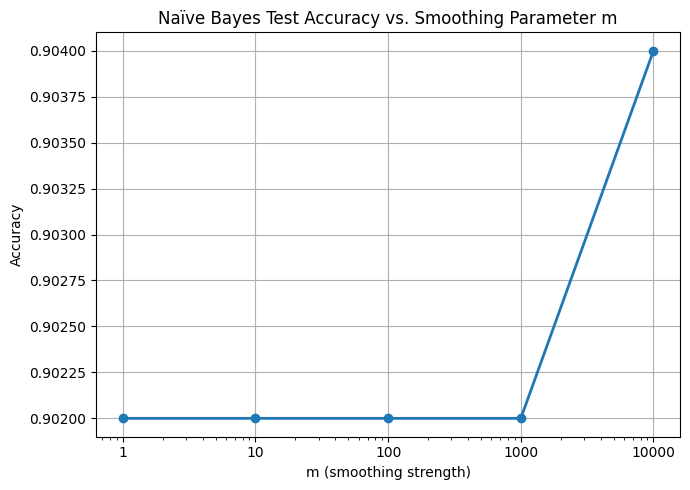

In [ ]:
# ---------- Accuracy vs m plot (using 1, 10, 100, 1000, 10000) ----------
import matplotlib.pyplot as plt

ms = [1, 10, 100, 1000, 10000]
accuracies = []

print("\nTesting different m values:", ms)
for m in ms:
    Pw_m = compute_pw_given_class(model, m=m, p_base=(1.0/model['V'] if model['V']>0 else 1.0))
    acc_m, _ = evaluate(test_docs, Pw_m, model['priors'], model['vocab'])
    accuracies.append(acc_m)
    print(f" m = {m:<6d} -> test acc = {acc_m:.4f}")

# Plot the accuracy curve
plt.figure(figsize=(7,5))
plt.plot(ms, accuracies, marker='o', linewidth=2)
plt.title("Naïve Bayes Test Accuracy vs. Smoothing Parameter m")
plt.xlabel("m (smoothing strength)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xscale('log')  # log scale since m spans orders of magnitude
plt.xticks(ms, labels=[str(m) for m in ms])
plt.tight_layout()
plt.show()


# Question 8 - Part 6

I'd use more words with high ham probability and avoid the ones with high spam probability.

# Question 9 - Part 1

since the clear sky is blue I will focus on the ratio of blue pixels with respect to all the pixels.

# Question 9 - Part 2

implementing the criterion.

In [21]:
def list_misclassified(y_true, y_pred, data_feats, max_show=5):
    mis = []
    for i,(feat,label,fname) in enumerate(data_feats):
        if y_pred[i] != label:
            mis.append((fname, label, y_pred[i], feat))
    print("  Misclassified count:", len(mis))
    for fname,lab,pred,feat in mis[:max_show]:
        print(f"   {fname}: true={lab}, pred={pred}")

In [11]:
import cv2
import random
import os
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("can't read "+path)
    return img

# ---------- user settings ----------
NUM_OF_IMAGES = 40
SEED = 12
clear = 'c'
cloudy = 's'
random.seed(SEED)
np.random.seed(SEED)
# -----------------------------------

# ---------- build file list ----------
dataset = [clear + str(i) + '.jpg' for i in range(1, NUM_OF_IMAGES + 1)]
dataset += [cloudy + str(i) + '.jpg' for i in range(1, NUM_OF_IMAGES + 1)]

images = []
for fname in dataset:
    if not os.path.exists(fname):
        raise FileNotFoundError(f"Image not found: {fname} (cwd={os.getcwd()})")
    img = load_image(fname)
    label = fname[0]
    images.append((img, label, fname))

In [12]:
random.shuffle(images)
split = int(0.8 * len(images))
train_set = images[:split]
test_set  = images[split:]

In [13]:
def blue_features(img):
    img_f = img.astype(np.float32)
    b,g,r = cv2.split(img_f)
    mean_r = r.mean(); mean_g = g.mean(); mean_b = b.mean()
    return mean_r

In [14]:
train_feats = []
for img, label, fname in train_set:
    train_feats.append((blue_features(img), label, fname))

test_feats = []
for img, label, fname in test_set:
    test_feats.append((blue_features(img), label, fname))

thr_blue  = np.mean([f[0] for f in train_feats])
print("Threshold (mean on TRAIN):")
print(f"  blue_ratio = {thr_blue:.5f}")

Threshold (mean on TRAIN):
  blue_ratio = 126.91335


In [15]:
def evaluate_predictor(predict_fn, predict_args, data_feats, label_order=['c','s']):
    y_true = [label for (_, label, _) in data_feats]
    y_pred = [predict_fn(feat[0], predict_args) for feat in data_feats]
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    prec_c = precision_score(y_true, y_pred, pos_label='c')
    rec_c  = recall_score(y_true, y_pred, pos_label='c')
    prec_s = precision_score(y_true, y_pred, pos_label='s')
    rec_s  = recall_score(y_true, y_pred, pos_label='s')
    return dict(accuracy=acc, confusion_matrix=cm,
                precision_c=prec_c, recall_c=rec_c,
                precision_s=prec_s, recall_s=rec_s,
                y_true=y_true, y_pred=y_pred)

def print_results(name, result):
    print(f"{name}")
    print("   Accuracy:", round(result['accuracy'],4))
    print("   Confusion matrix (rows=true ['c','s'], cols=pred ['c','s']):\n", result['confusion_matrix'])
    print("   Precision clear 'c' = {:.3f}, Recall clear 'c' = {:.3f}".format(result['precision_c'], result['recall_c']))
    print("   Precision cloudy 's' = {:.3f}, Recall cloudy 's' = {:.3f}".format(result['precision_s'], result['recall_s']))
    print()

In [16]:
def predict_blue(feat, thr_blue):
    return 'c' if feat > thr_blue else 's'

In [17]:
res_blue  = evaluate_predictor(predict_blue, thr_blue, test_feats)

print_results(f"2) BLUE_RATIO classifier (thr={thr_blue:.5f})", res_blue)

2) BLUE_RATIO classifier (thr=126.91335)
   Accuracy: 0.5
   Confusion matrix (rows=true ['c','s'], cols=pred ['c','s']):
 [[3 3]
 [5 5]]
   Precision clear 'c' = 0.375, Recall clear 'c' = 0.500
   Precision cloudy 's' = 0.625, Recall cloudy 's' = 0.500



In [22]:
list_misclassified(res_blue['y_true'], res_blue['y_pred'], test_feats)

  Misclassified count: 8
   s33.jpg: true=s, pred=c
   c30.jpg: true=c, pred=s
   s19.jpg: true=s, pred=c
   c36.jpg: true=c, pred=s
   s8.jpg: true=s, pred=c


# Question 9 - Part 3

this time I will use the fraction of white pixels.

In [23]:
def white_features(img):
    img_f = img.astype(np.float32)
    b,g,r = cv2.split(img_f)
    white_mask = (r>220) & (g>220) & (b>220)
    white_frac = white_mask.sum() / (img.shape[0]*img.shape[1])
    return white_frac

In [24]:
def predict_white(feat, thr_white):
    return 's' if feat > thr_white else 'c'

In [25]:
train_feats = []
for img, label, fname in train_set:
    train_feats.append((white_features(img), label, fname))

test_feats = []
for img, label, fname in test_set:
    test_feats.append((white_features(img), label, fname))

thr_white = np.mean([f[0]for f in train_feats])

print("Threshold (mean on TRAIN):")
print(f"  white_frac = {thr_white:.6f}\n")

Threshold (mean on TRAIN):
  white_frac = 0.011428



In [26]:
res_white  = evaluate_predictor(predict_white, thr_white, test_feats)

print_results(f"2) WHITE_RATIO classifier (thr={thr_white:.5f})", res_white)

2) WHITE_RATIO classifier (thr=0.01143)
   Accuracy: 0.25
   Confusion matrix (rows=true ['c','s'], cols=pred ['c','s']):
 [[3 3]
 [9 1]]
   Precision clear 'c' = 0.250, Recall clear 'c' = 0.500
   Precision cloudy 's' = 0.250, Recall cloudy 's' = 0.100



In [27]:
list_misclassified(res_white['y_true'], res_white['y_pred'], test_feats)

  Misclassified count: 12
   s33.jpg: true=s, pred=c
   s17.jpg: true=s, pred=c
   s36.jpg: true=s, pred=c
   c1.jpg: true=c, pred=s
   c30.jpg: true=c, pred=s
